![logo](../img/license_header_logo.png)
> **Copyright &copy; 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program and the accompanying materials are made available under the
terms of the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). <br>
Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
License for the specific language governing permissions and limitations
under the License. <br>
<br>**SPDX-License-Identifier: Apache-2.0**

# 02 - Creating different types of graphs with Pyplot
## Introduction
There are different types of plots available in Matplotlib, each has its usage with certain specific data. Proper selection of plots is very essential and this needs to be understood before moving forward with the creation of plots. The most commonly used plots are:
1. Bar Plots
2. Histograms
3. Pie Plots
4. Area Plots
5. Scatter Plots
6. Time Series Graph

## Notebook Outline
Below is the outline for this tutorial:
1. [Histograms](#Histograms)
2. [Scatter plot](#Scatter)
    1. [Scatter plot with groups / categorical data](#categorical)
3. [Box plot](#Box)
    1. [Multiple box plot](#Multiple) 
4. [Customizing Matplotlib with rcParams](#Customizing)
5. [Exercise](#Exercise)
6. [Summary](#Summary)
7. [Reference](#Reference)


## What will we accomplish?
In this hands-on, we will focus on creating the histogram, scatter plot, box plot and the way to plot with categorical variable. Beside, we will demonstrate how to fix the figure size for all the plot by using `rcParams`
    
First, let's import the Pyplot library

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## <a name="Histograms">Histograms</a>
Histograms are created using `plt.hist()` function. It has an attribute `bin` that takes into input the range/nature of bins you want for the histogram. Leaving the `bin` attribute empty will assign the default bin value which is 10. For details, please refer to [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
![image](https://user-images.githubusercontent.com/59526258/113844926-917b6000-97c7-11eb-9403-f0f76f8f9e6e.png)


For example, you have to collect personal height data from 250 students. You plan to use a histogram to visualize your data.

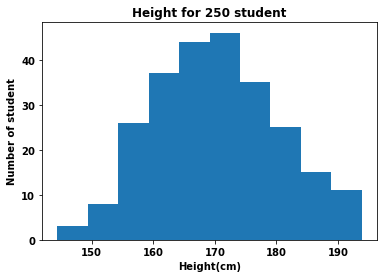

In [2]:
np.random.seed(0)
# Random generate data with mean = 170 , standard deviation = 10 for 250 student
x = np.random.normal(170, 10, 250)
plt.hist(x)
plt.title("Height for 250 student")
plt.xlabel("Height(cm)")
plt.ylabel("Number of student")
plt.show() 

You can specify the limit of the bins by assigning it to `bins` attributes

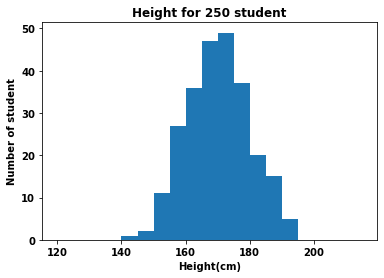

In [4]:
bins = np.arange(120,220,5)
plt.hist(x,bins=bins )
plt.title("Height for 250 student")
plt.xlabel("Height(cm)")
plt.ylabel("Number of student")
plt.show() 

##  <a name="Scatter">Scatter plot</a>
Scatter plot can be created using `plt.scatter()` function. It has some useful attributes that we need to encounter such as : 
![image](https://user-images.githubusercontent.com/59526258/113953545-a64d0780-984a-11eb-9222-6cc37649ed0d.png)
Please refer [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) for more details in the scatter plot.

As an example, we take residential home sales in Ames, Iowa between 2006 and 2010 as data for scatter plot visualization. The data set contains many explanatory variables on the quality and quantity of physical attributes of residential homes in Iowa sold between 2006 and 2010. Most of the variables describe information a typical home buyer would like to know about a property (square footage, number of bedrooms and bathrooms, size of lot, etc.). 

In [5]:
import pandas as pd
house_data = pd.read_csv('https://raw.githubusercontent.com/josephpconley/R/master/openintrostat/OpenIntroLabs/(4)%20lab4/data%20%26%20custom%20code/AmesHousing.csv')
house_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


We will create a scatter plot by taking Living Area Above Ground(Gr Liv Area) and Sales Price as axes to study the correlation between them. Let's take `alpha = 0.5` to create a better result.
>*Notes: alpha -> The alpha blending value, between 0 (transparent) and 1 (opaque).*

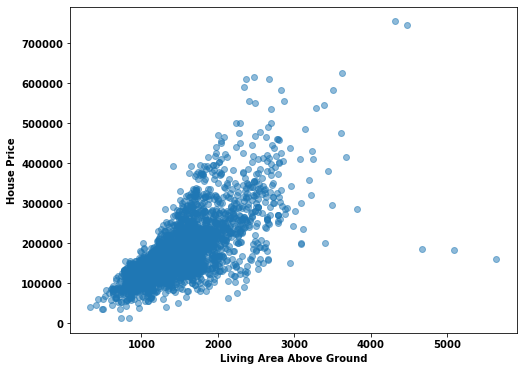

In [90]:
x= house_data['Gr Liv Area']
y = house_data['SalePrice']
plt.xlabel("Living Area Above Ground")
plt.ylabel("House Price")
plt.scatter(x,y,alpha=0.5)

As we can observe from the scatter plot, the more area there is above ground level, the higher the price of the house was.

###  <a name="categorical">Scatter plot with groups / categorical data</a>
Categorical data can be visualized using a scatter plot to have a clear picture of how the data is been grouped.

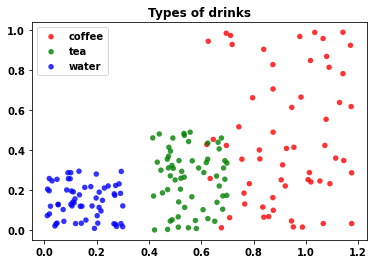

In [6]:
# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))

data = (g1, g2, g3)
colors = ("red", "green", "blue")
groups = ("coffee", "tea", "water")

for data, color, group in zip(data, colors, groups):
    x, y = data
    plt.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
plt.title('Types of drinks')
plt.legend(loc=2)
plt.show()

## <a name="Box">Box plot</a>
>*A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a verticle line is also there which goes through the box at the median. Here x-axis denotes the data to be plotted while the y-axis shows the frequency distribution.* - ***GeeksforGeeks***

![image](https://user-images.githubusercontent.com/59526258/113961101-18781900-9858-11eb-9ee4-68bb19efb9f0.png)
For box plot details, please refer to [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

Let's start with a single box plot

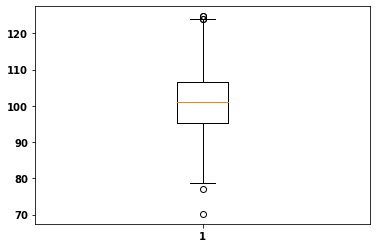

In [7]:
# Creating dataset
np.random.seed(10)
data = np.random.normal(100, 10, 200)
  
# Creating plot
plt.boxplot(data)
  
# show plot
plt.show()

As you can notice, the mean of the data is around 100, lower quartile is about 95, upper quartile is about 106. Besides, the data contains few outliers.

>*Notes: You may convert the data into Pandas series and use `df.describe()` to print the statistical value*

In [8]:
series = pd.Series(data)
series.describe()

count    200.000000
mean     100.743069
std        9.786932
min       70.204032
25%       95.160958
50%      100.943684
75%      106.637529
max      124.676511
dtype: float64

### <a name="Multiple">Multiple box plot </a>
Let's try to create multiple box plot

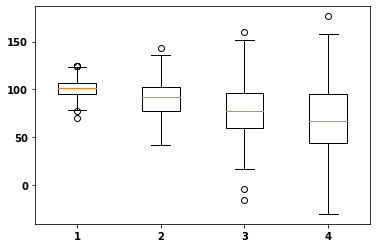

In [9]:
# Creating dataset
np.random.seed(10)
  
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
plt.boxplot(data)
plt.show()

##  <a name="Customizing">Customizing Matplotlib with rcParams</a>
Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the `plt.rc` convenience routine. For details, please refer to [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html).

Let's try to change the figure size using `plt.rcParams["figure.figsize"]`

In [30]:
plt.rcParams["figure.figsize"] = (10,8)

Let's plot the box plot again and observe the difference 

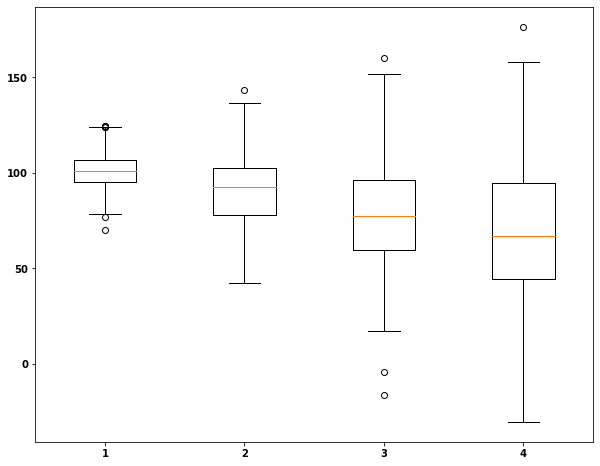

In [31]:
# Creating plot
plt.boxplot(data)
  
# show plot
plt.show()

As you notice, the figure size has enlarged to (10,8) without specifically using `plt.figure()`. Please feel free to try on other plots as well.

## <a name="Exercise ">Exercise</a>
### Introduction
You are given a set of data that contain the number of COVID-19 cases in Malaysia. You are required to create:
1. Histogram for each column data: `Confirmed`, `Death`, `Recovered`.
2. Boxplot for each column data: `Confirmed`, `Death`, `Recovered`.
3. Scatter plot between `Confirmed` and `Deaths` cases.

First, let us read and preprocess the COVID-19 dataset.

In [45]:
from pathlib import Path

# Read and preprocess the dataset
dataste_dir_path = Path().resolve().parent/'Datasets'
data_dir_path = dataste_dir_path/'covid_19_data.csv'
covid_data = pd.read_csv(data_dir_path)
new_covid_data = covid_data.loc[covid_data["Country/Region"] == 'Malaysia']
new_covid_data = new_covid_data.set_index(pd.to_datetime(new_covid_data["ObservationDate"]))
new_covid_data = new_covid_data.drop(columns = ['SNo','ObservationDate','Province/State','Country/Region','Last Update'])
new_covid_data.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-23,0.0,0.0,0.0
2020-01-25,3.0,0.0,0.0
2020-01-26,4.0,0.0,0.0
2020-01-27,4.0,0.0,0.0
2020-01-28,4.0,0.0,0.0


>**Instruction:**<br>
Set your default plot size to (8,6) by using `plt.rcParams["figure.figsize"]`
    
>**Expected Result:**<br>
`print(plt.rcParams["figure.figsize"])`:<br>
`[8.0, 6.0]`

In [44]:
### BEGIN SOLUTION
plt.rcParams["figure.figsize"] = (8,6)
### END SOLUTION

In [121]:
print(plt.rcParams["figure.figsize"])

[8.0, 6.0]


>**Instruction:**<br>
    1. Create a histogram for each column data in `new_covid_data`<br>
    2. The plot result must be similar to **Expected Result**<br>
    
>**Expected Result:**<br>
![image](https://user-images.githubusercontent.com/59526258/114000954-0fa23a00-988e-11eb-9c33-ac9a28053e0f.png)


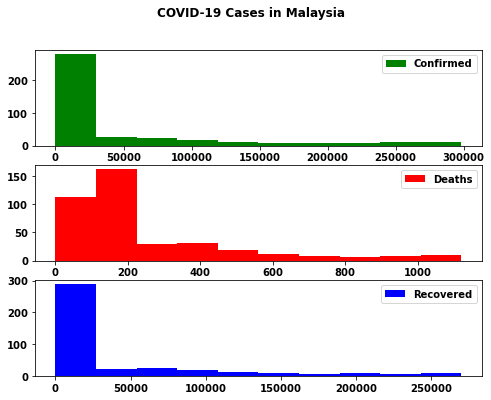

In [83]:
### BEGIN SOLUTION
fig, ax = plt.subplots(nrows=3,ncols=1)
color = ['green','red','blue']
plt.suptitle("COVID-19 Cases in Malaysia")
for index in range(len(new_covid_data.columns)):
    ax[index].hist(new_covid_data[str(new_covid_data.columns[index])],label = new_covid_data.columns[index],
                  color = color[index])
    ax[index].legend()
### END SOLUTION

>**Instruction:**<br>
    1. Create a box plot for each column data in `new_covid_data`.<br>
    2. The plot result must be similar to **Expected Result**.<br>
    
>*Hints: use `set_xticklabels` to help you changing the x-label.*
    
>**Expected Result:**<br>
![image](https://user-images.githubusercontent.com/59526258/114003230-28abea80-9890-11eb-9c9d-61cef8daf257.png)

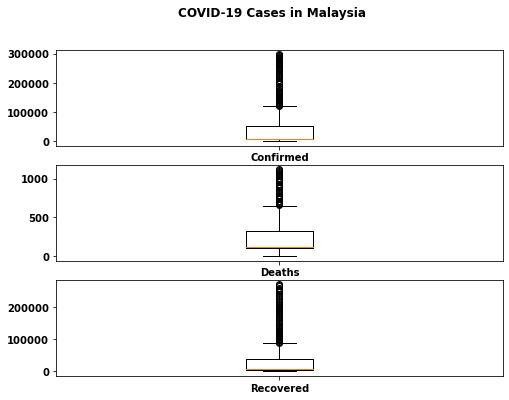

In [122]:
# Creating plot
### BEGIN SOLUTION
fig, ax = plt.subplots(nrows=3,ncols=1)
plt.suptitle("COVID-19 Cases in Malaysia")
for index in range(len(new_covid_data.columns)):
    ax[index].boxplot(new_covid_data[str(new_covid_data.columns[index])])  
    ax[index].set_xticklabels([new_covid_data.columns[index]])
### END SOLUTION

>**Instruction:**<br>
    1. Create a scatter plot to examine the relationship between `Confirmed` and `Deaths` with `alpha = 0.5`.<br>
    2. The plot result must be similar to the **Expected Result**.<br>
    
    
>**Expected Result:**<br>
![image](https://user-images.githubusercontent.com/59526258/114004060-de773900-9890-11eb-99ea-f7c6aa4de9d3.png)

Text(0, 0.5, 'Deaths Cases')

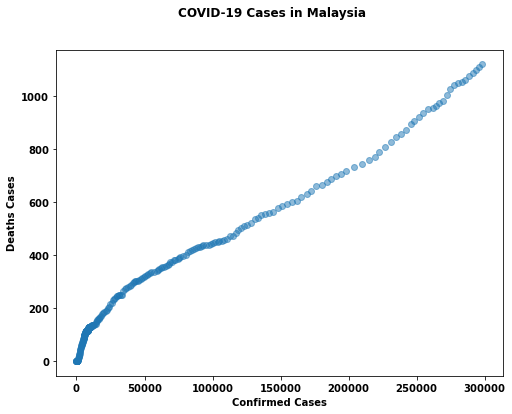

In [123]:
### BEGIN SOLUTION
plt.scatter(new_covid_data.Confirmed,new_covid_data.Deaths,alpha=0.5)
plt.suptitle("COVID-19 Cases in Malaysia")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths Cases")
### END SOLUTION

# <a name="Summary">Summary</a>
From this tutorial, you should have learned:
1. Creating different types of graphs with Pyplot.
2. Familiar with the process of creating Histogram, Scatter Plot and Boxplot.

Congratulations, that concludes this lesson. 

##  <a name="Reference">Reference</a>
1. [Headstart to Plotting Graphs using Matplotlib library](https://www.analyticsvidhya.com/blog/2020/10/headstart-to-plotting-graphs-using-matplotlib-library/)
2. [Matplotlib Histograms](https://www.w3schools.com/python/matplotlib_histograms.asp)
3. [Matplotlib Scatter Plot - Tutorial and Examples](https://stackabuse.com/matplotlib-scatterplot-tutorial-and-examples/)